In this assignment, we experiment with boosting as a method for improving the prediction accuracy of learning algorithms.

1. Use scikit-learn but design your own implementation of the AdaBoost algorithm.
As a bonus, compare this with the implementation of AdaBoost in scikit-learn.

2. Test the boosting algorithm on the MNIST digit database.
Convert the multiclass dataset to a two-class dataset (for example: even versus odd, prime versus non-prime, etc).

3. Choose at least two "weak" learners for your experiments.
For one of the weak learners, use the decision tree classifier which is supported by scikit-learn.
Then, choose another weak classifier of your choice (within scikit-learn) and compare this with the decision tree weak classifier.

4. Provide a plot showing how the training error of the AdaBoost classifier changes during the boosting process.
Determine whether boosting works effectively and which weak classifier is better. 

_Submit via email your source file(s) and the plot (as PDF). Provide a brief demo of your program. You may work in groups of three._

**Bonus**
Repeat the above using a different real-world dataset (other than the MNIST digit dataset) of your choice. 

In [1]:
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

import matplotlib.pyplot as plt

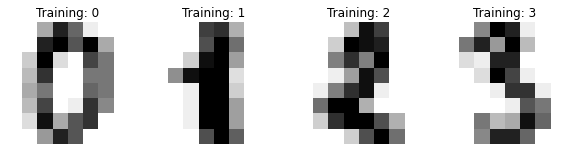

In [2]:
# Load the digits dataset
digits = datasets.load_digits()

# Display some images
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

In [3]:
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Convert the multiclass dataset to a two-class dataset
# even -1 or odd 1
target = [2 * (t % 2) - 1 for t in digits.target]

# Split data into 25% train and 75% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, target, test_size=0.25, shuffle=False
)

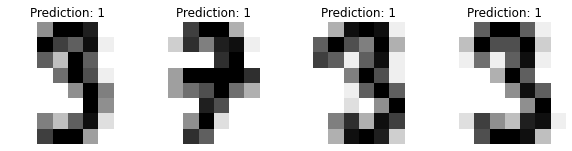

In [4]:
# Decision tree classifier
clf = DecisionTreeClassifier(random_state=0)

# Learn the digits on the train subset
clf.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

In [5]:
print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

Classification report for classifier DecisionTreeClassifier(random_state=0):
              precision    recall  f1-score   support

          -1       0.86      0.91      0.89       222
           1       0.91      0.86      0.88       228

    accuracy                           0.89       450
   macro avg       0.89      0.89      0.89       450
weighted avg       0.89      0.89      0.89       450




In [6]:
# sklearn AdaBoost
clf2 = AdaBoostClassifier(n_estimators=100, random_state=0)

# Learn the digits on the train subset
clf2.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted2 = clf2.predict(X_test)

print(
    f"Classification report for classifier {clf2}:\n"
    f"{metrics.classification_report(y_test, predicted2)}\n"
)

Classification report for classifier AdaBoostClassifier(n_estimators=100, random_state=0):
              precision    recall  f1-score   support

          -1       0.94      0.92      0.93       222
           1       0.93      0.94      0.93       228

    accuracy                           0.93       450
   macro avg       0.93      0.93      0.93       450
weighted avg       0.93      0.93      0.93       450


